<a href="https://colab.research.google.com/github/MMAmunzir/image-processing.-A1/blob/main/image_processing_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

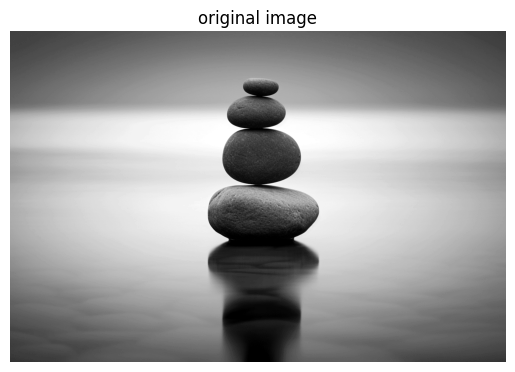

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/convert_to_jpg.png'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def display_image(image, title=''):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

display_image(image,'original image')

enter intensity:1


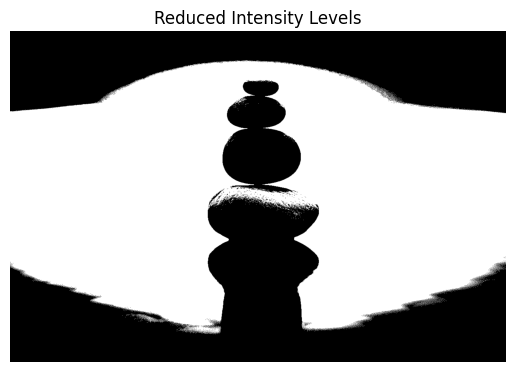

In [5]:
reduced_levels = int(input('enter intensity:'))

def reduce_intensity_levels(image, levels):
    max_val = 255
    new_max_val = 2 ** levels - 1
    factor = max_val / new_max_val
    reduced_image = np.uint8(np.round(image / factor) * factor)
    return reduced_image
reduced_image = reduce_intensity_levels(image, reduced_levels)
display_image(reduced_image, 'Reduced Intensity Levels')


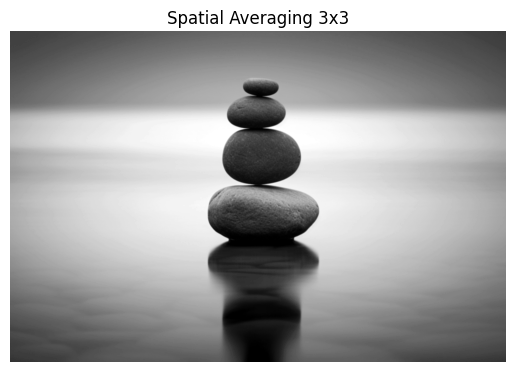

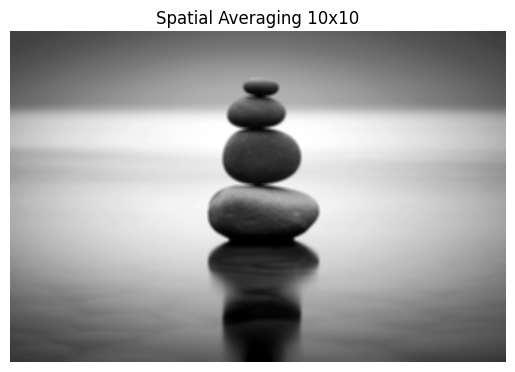

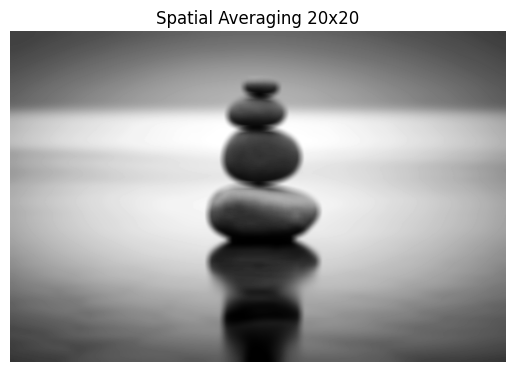

In [6]:
def spatial_average(image, neighborhood_size):
    kernel = np.ones((neighborhood_size, neighborhood_size), dtype=np.float32) / (neighborhood_size ** 2)
    return cv2.filter2D(image, -1, kernel)
neighborhood_sizes = [3, 10, 20]
averaged_images = [spatial_average(image, size) for size in neighborhood_sizes]

for size, averaged_image in zip(neighborhood_sizes, averaged_images):
    display_image(averaged_image, f'Spatial Averaging {size}x{size}')


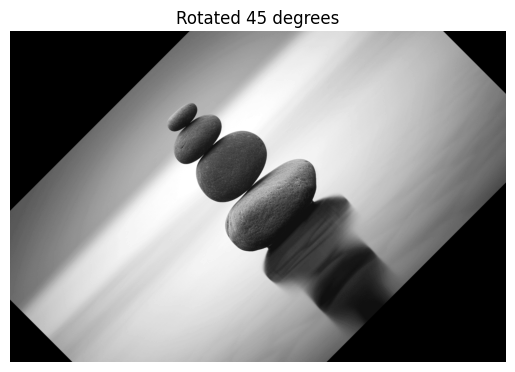

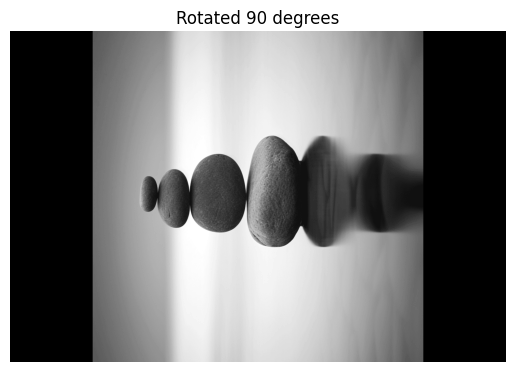

In [7]:
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image
rotated_45 = rotate_image(image, 45)
rotated_90 = rotate_image(image, 90)

display_image(rotated_45, 'Rotated 45 degrees')
display_image(rotated_90, 'Rotated 90 degrees')


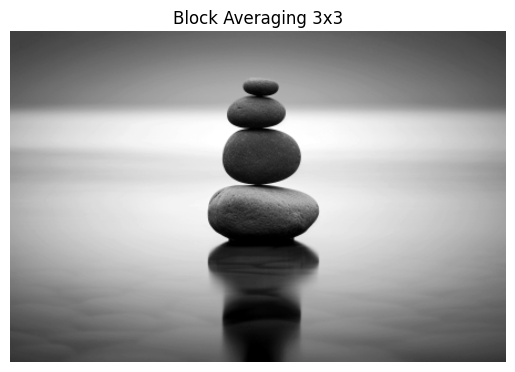

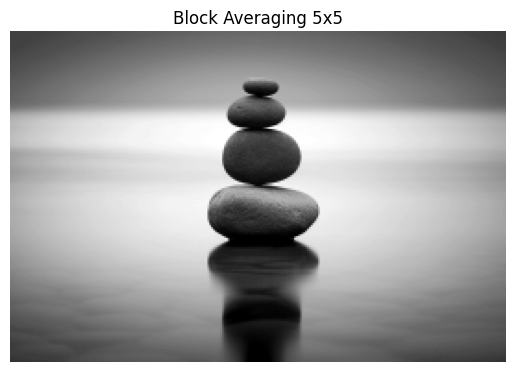

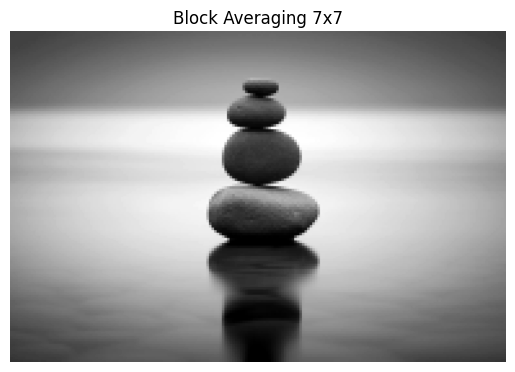

In [8]:
def block_average(image, block_size):
    result = np.zeros_like(image)
    for i in range(0, image.shape[0], block_size):
        for j in range(0, image.shape[1], block_size):
            block = image[i:i+block_size, j:j+block_size]
            mean = np.mean(block)
            result[i:i+block_size, j:j+block_size] = mean
    return result

block_sizes = [3, 5, 7]
block_averaged_images = [block_average(image, size) for size in block_sizes]

for size, block_averaged_image in zip(block_sizes, block_averaged_images):
    display_image(block_averaged_image, f'Block Averaging {size}x{size}')